Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
out_enco (Dense)             (None, 2)                 6274      
Total params: 25,090
Trainable params: 25,090
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3136)              9408      
______________________________________

<Figure size 432x288 with 0 Axes>

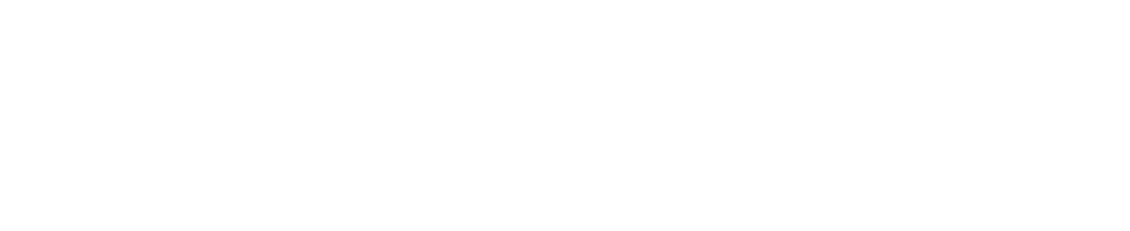

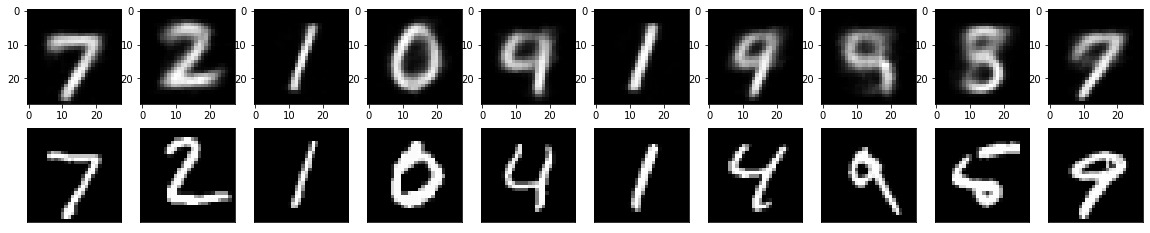

In [23]:
##### I- DEFINING THE LAYERS OF THE AUTOENCODER AND TRAINING IT 

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras import backend as K
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
from keras.layers import LeakyReLU,Dense,Input,Conv2D, Flatten,Reshape, Conv2DTranspose,Dropout
from keras.models import Model, Sequential


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to (28, 28, 1) and normalize in range  [0...1] the images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


################## Autoencoder part I : the encoder #############


encoder = Sequential(name ="Encoder")

encoder.add(Conv2D(filters=32,kernel_size=3,strides=2,padding='same',activation=LeakyReLU(alpha=0.1), input_shape = (28,28,1)))

encoder.add(Conv2D(filters=64,kernel_size=3,activation=LeakyReLU(alpha=0.1),strides=2,padding='same'))

encoder.add(Flatten())
encoder.add(Dense(2,name= "out_enco",activation='sigmoid'))

encoder.summary()

################### Autoencoder part II : the decoder #############


decoder = Sequential(name ="Decoder")
decoder.add(Dense((7*7*64),activation=LeakyReLU(alpha=0.1), input_shape = (2,)))

decoder.add(Reshape((7,7,64)))
decoder.add(Conv2DTranspose(filters=64,kernel_size=3,strides=2,activation=LeakyReLU(alpha=0.1),padding='same'))

decoder.add(Conv2DTranspose(filters=32,kernel_size=3,strides=2,activation=LeakyReLU(alpha=0.1),padding='same'))

decoder.add(Conv2DTranspose(filters=1,kernel_size=3,activation='sigmoid',padding='same'))

decoder.summary()


################### Autoencoder part III : first results #############

## Defining and compiling the autoencoder


autoencoder =Sequential(name ="Autoencoder")
autoencoder.add(encoder)
autoencoder.add(decoder)
autoencoder.compile(loss='mse', optimizer='adam')

### To load weights
filepath="last.hdf5"
autoencoder.load_weights("2_sigmoidal_units.hdf5")

autoencoder.summary()



# predict the autoencoder output for some test data
x_decoded = decoder.predict(encoder.predict(x_test[:10]))

print(np.shape(x_decoded))


plt.gray()

plt.figure(figsize=(20, 4))
plt.axis('off')


n = 10  # digits to be shown
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_decoded[i,:,:,:].reshape(28, 28))


    ax = plt.subplot(2, n, i+11)
    plt.imshow(x_test[i,:,:,:].reshape(28, 28))
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

(28, 112)


<Figure size 1440x288 with 0 Axes>

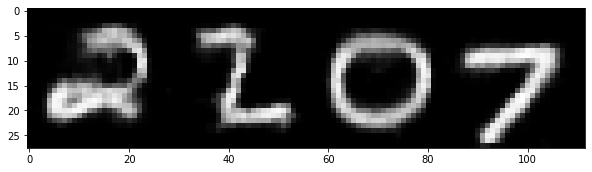

In [19]:
#Encoder layer....

from numpy import random
dim=2
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

plt.figure(figsize=(20, 4))
x_decoded=np.zeros((400,28,28,1))
eyemat=np.eye(dim)
Int_pos=np.zeros((4,2))
Int_pos[0,:]=[0,0]
Int_pos[1,:]=[0,1]
Int_pos[2,:]=[1,0]
Int_pos[3,:]=[1,1]
cnt=0
for i in range(4):

  x_decoded[i] = decoder.predict((np.array(Int_pos[i,:])).reshape(1,dim))
  

a=np.zeros((28,28*4),dtype=np.uint8)
for j in range(4):

    # display original
    imcurr=np.uint8(255*x_decoded[j].reshape(28, 28))
    a[:28,j*28:(j*28)+28]=imcurr
      
print(np.shape(a))
plt.figure(figsize = ((10,10)))
plt.imshow(a)      
plt.gray()


plt.show()
#Image.fromarray(imgs).save('corrupted_and_denoised.png')

<Figure size 432x288 with 0 Axes>

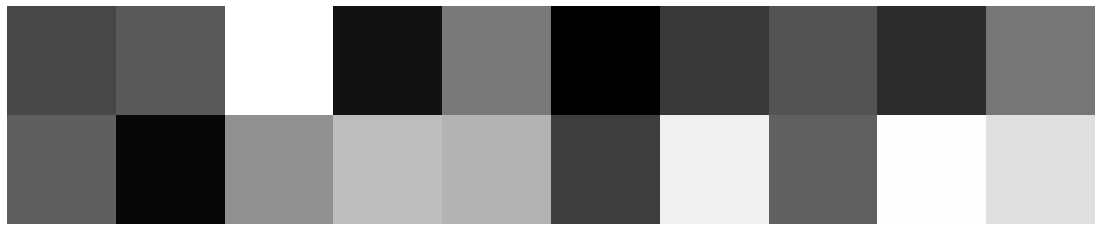

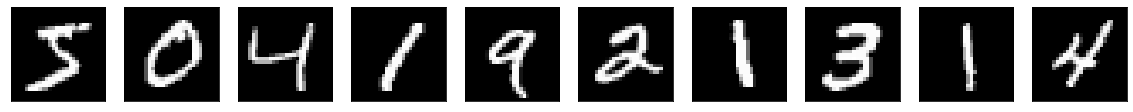

In [20]:
# display  of the lower dimensionality representation for specific samples


import numpy as np

# using the encoder (compressor to obtain a n-D representation of the handritten digits)
x_encoded= encoder.predict(x_train)

plt.gray()

plt.figure(figsize=(20, 4))
plt.axis('off')
plt.imshow(x_encoded[:10,:].T)

n = 10  # digits to be shown
plt.figure(figsize=(20, 4))
for i in range(n):
    # display test_data that generated the compressed representation
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i,:,:,:].reshape(28, 28))
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()


(60000,)


Text(0.5, 1.0, 'Data points in lower dimensional space')

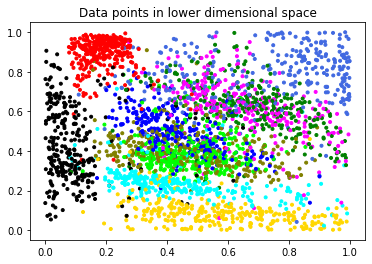

In [21]:
#Visualisation of data using 2 of the Non-Linear Principal Components 

from matplotlib import pyplot
x_encoded = encoder.predict(x_train)

print(np.shape(y_train))

colors = ['gold','red','black','lime','green','olive','cyan','royalblue','blue','magenta']

pyplot.scatter(x_encoded[0:60000:20,0],x_encoded[0:60000:20,1], marker = '.',color=np.array(colors)[(y_train[0:60000:20])])

pyplot.title('Data points in lower dimensional space')





<Figure size 1800x1800 with 0 Axes>

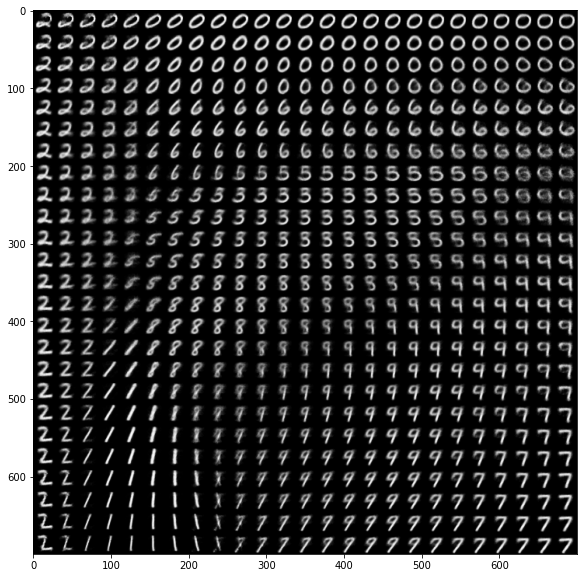

In [22]:
#Generating samples from the low-dimensional representation to the handwritten-digits space 

from numpy import random


plt.figure(figsize=(25, 25))
x_decoded=np.zeros((625,28,28,1))
cnt=0
dim=2
for i in range(25):
  for j in range(25):
    x_decoded[cnt] = decoder.predict( np.array([i/25,j/25]).reshape(1,dim))
    cnt=cnt+1

a=np.zeros((25*28,25*28),dtype=np.uint8)
for i in range(25):
  for j in range(25):

      imcurr=np.uint8(255*x_decoded[i+(25*j)].reshape(28, 28))
      a[i*28:(i*28)+28,j*28:(j*28)+28]=imcurr
      
plt.figure(figsize = ((10,10)))
plt.imshow(a)      
plt.gray()


plt.show()
